In [ ]:
from main import KNNevaluate,view_average_metrics,view_detailed_metrics
from preprocess import separate_target,min_max_normalization,dim_reduction_PCA,feature_correlation_heatmap,standardization
from view_data import read,view_unique_values,view_columns,view_label_distribution,view_stats

In [3]:
df = read("../../datasets/eeg.csv") #takes filepath as input

In [4]:
view_columns(df) #details about all the columns 

V1 column is of type float64
V2 column is of type float64
V3 column is of type float64
V4 column is of type float64
V5 column is of type float64
V6 column is of type float64
V7 column is of type float64
V8 column is of type float64
V9 column is of type float64
V10 column is of type float64
V11 column is of type float64
V12 column is of type float64
V13 column is of type float64
V14 column is of type float64
Class column is of type int64


In [5]:
view_stats(df)#displays important stats about the dataframe

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,4301.378607,4009.507626,4264.083569,4122.377696,4341.561287,4620.060675,4072.823013,4615.788517,4201.341742,4231.202968,4202.150055,4279.089914,4606.009665,4361.304558,1.448851
std,37.770271,30.087356,21.335365,20.929477,17.007343,18.517252,20.910175,18.341333,17.841047,19.765889,24.475270,20.093956,33.405176,38.472996,0.497394
min,4197.950000,3905.640000,4197.440000,4058.460000,4304.620000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,4504.100000,4156.920000,4386.150000,4250.260000,4463.590000,4756.920000,4178.460000,4731.790000,4320.000000,4362.560000,4332.310000,4397.950000,4833.850000,4573.330000,2.000000


In [6]:
view_unique_values(df)

Unique values in Column V1 are 544
Unique values in Column V2 are 448
Unique values in Column V3 are 341
Unique values in Column V4 are 308
Unique values in Column V5 are 281
Unique values in Column V6 are 326
Unique values in Column V7 are 286
Unique values in Column V8 are 290
Unique values in Column V9 are 300
Unique values in Column V10 are 342
Unique values in Column V11 are 415
Unique values in Column V12 are 339
Unique values in Column V13 are 554
Unique values in Column V14 are 588
Unique values in Column Class are 2


In [7]:
df,label = separate_target(df) #returns a datafram and a series respectively

In [8]:
view_label_distribution(label) #view the number of rows/samples belonging to each class 


8254 samples have label 1
6722 samples have label 2


In [9]:
normalized_df = min_max_normalization(df)#returns normalized dataframe 
normalized_df.head()#view top 5 rows 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.428809,0.412249,0.486408,0.467935,0.287098,0.104838,0.464644,0.448636,0.431548,0.408315,0.479015,0.403616,0.493436,0.511871
1,0.413751,0.393903,0.510890,0.470594,0.235453,0.107564,0.468059,0.436122,0.366084,0.352103,0.463562,0.398436,0.485554,0.485355
2,0.423779,0.402061,0.518997,0.510688,0.203183,0.091419,0.464644,0.383209,0.348210,0.330075,0.459171,0.411436,0.475062,0.499306
3,0.427144,0.422437,0.524456,0.508029,0.245141,0.086020,0.468059,0.386307,0.404794,0.393630,0.476820,0.440077,0.484249,0.518834
4,0.418749,0.422437,0.502729,0.483942,0.270932,0.107564,0.457948,0.367596,0.366084,0.435205,0.485644,0.442718,0.485554,0.524409


In [10]:
standardized_df = standardization(df)
standardized_df.head()#view top 5 rows 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.737414,-0.009228,1.178666,1.234296,0.511485,-1.831363,1.152443,1.376254,1.160747,0.367162,0.373040,0.070675,0.894811,0.845958
1,0.615356,-0.162453,1.395215,1.258664,0.028736,-1.803280,1.177312,1.263935,0.528476,-0.229341,0.226356,0.019911,0.802607,0.592525
2,0.696640,-0.094316,1.466929,1.626101,-0.272908,-1.969617,1.152443,0.789036,0.355835,-0.463084,0.184680,0.147317,0.679867,0.725869
3,0.723911,0.075861,1.515208,1.601732,0.119289,-2.025243,1.177312,0.816843,0.902346,0.211332,0.352202,0.428008,0.787339,0.912500
4,0.655866,0.075861,1.323032,1.380984,0.360369,-1.803280,1.103662,0.648910,0.528476,0.652511,0.435963,0.453887,0.802607,0.965786


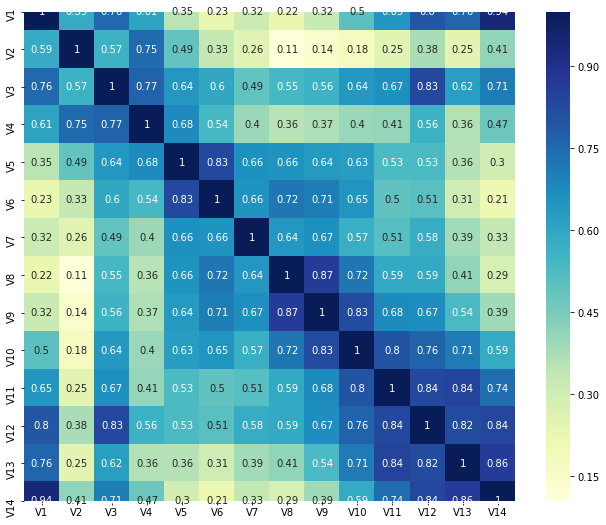

In [11]:
feature_correlation_heatmap(normalized_df)#returns a heatmap detailing the correlation of features 

In [12]:
#pass different values in components to see how if affects the information preserved and evaluation metrics later on 
#pass standardized dataframe to compare subtle difference in the following results  
PC_df_norm = dim_reduction_PCA(normalized_df,components=6)
PC_df_std = dim_reduction_PCA(standardized_df,components=6)

Amount of information preserved in 6 principle components is 94.07%
Amount of information preserved in 6 principle components is 93.50%


In [13]:
PC_df_norm.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.260044,0.006056,0.039604,0.062581,0.124677,0.091564
1,0.199472,0.026581,0.024341,0.086168,0.177225,0.066468
2,0.183669,0.086465,0.008852,0.106194,0.198589,0.050071
3,0.253000,0.071059,0.025340,0.084942,0.162661,0.065413
4,0.246538,0.068090,0.032105,0.079686,0.115537,0.029452


In [14]:
#change the value of neighbors to see the performance of KNN classifer vary over the evaluation metrics  
#change the number of splits in K Fold cross validation to optimize results 
scores = KNNevaluate(PC_df_norm,label,neighbors=7,splits=10)
#compare results with standardized dataframe as input 
scores = KNNevaluate(PC_df_std,label,neighbors=7,splits=10)

In [15]:
view_average_metrics(scores) #view average accuracy,precision, f1 score and recall over the splits 

 Average accuracy 0.84 
 Average precision 0.84 
 Average recall 0.87 
 Average f1 score 0.85


In [16]:
view_detailed_metrics(scores) #view evaluation metrics for each split 

All the test_accuracy values are 0.85,0.83,0.81,0.82,0.83,0.83,0.83,0.84,0.83,0.83
All the test_precision values are 0.84,0.84,0.81,0.82,0.83,0.85,0.82,0.85,0.82,0.84
All the test_recall values are 0.89,0.86,0.85,0.86,0.86,0.86,0.86,0.87,0.87,0.86
All the test_f1_score values are 0.86,0.85,0.83,0.84,0.85,0.86,0.84,0.86,0.85,0.85
